В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике :)  

Ссылка на данные: https://stepik.org/media/attachments/lesson/384453/conversion.csv

**Задание** 
1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
- Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения
- Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
- Проанализируйте CTR с разбивкой по рекламной кампании.
-Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
- Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
- Посчитайте конверсию из клика в покупку.

**Описание данных**  
- ad_id – идентификатор объявления (рекламы)
- xyz_campaign_id – идентификатор рекламной кампании в базе компании X
- fb_campaign_id – идентификатор кампании в Facebook
- age – возрастная группа, которой показывалась реклама
- gender – пол тех, кому показывалась реклама
- interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
- impressions – число показов
- clicks – число кликов
- spent – сумма, которую компания потратила на показ объявления 
- total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
- approved_conversion – количество людей, которые купили продукт после просмотра рекламы

1.Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено? 

In [35]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

sns.set(style="whitegrid", font_scale=1.5)

url = 'https://stepik.org/media/attachments/lesson/384453/conversion.csv'
df = pd.read_csv(url)
df = df.dropna()
df.head()


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [36]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

3. Постройте график распределения числа показов 
(Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, 
прологарифмировав значения
fb_campaign_id – идентификатор кампании в Facebook
np.log()


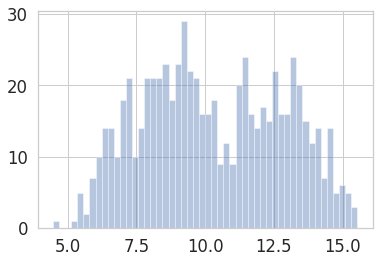

In [37]:
fd_log = np.log(df.groupby(df.fb_campaign_id).agg({'Impressions' : 'sum'}))
                                                  
sns.distplot(fd_log, kde = False, bins = 50)

- **Распределение бимодальное**
- Распределение симметричное
- **Полученное распределение не является нормальным**
- Полученное распределение является нормальным
- Распределение унимодальное

4. Теперь посчитаем ещё несколько полезных метрик.
Первая – CTR (click-through rate), которая показывает кликабельность, 
т.е. отношение числа кликов к количеству показов.

Создайте новую колонку, затем посмотрите на описательные статистики.
В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [38]:
df['ctr'] = df['Clicks']/df['Impressions']
df = df.sort_values(by=['ctr'])
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
434,950109,936,123445,30-34,M,20,343,0,0.00,1,1,0.000000
467,951021,936,123597,30-34,F,7,457,0,0.00,1,1,0.000000
516,952080,936,123774,40-44,F,27,415,0,0.00,1,0,0.000000
181,747879,936,110947,30-34,F,30,493,0,0.00,1,0,0.000000
182,747903,936,110951,30-34,F,63,1491,0,0.00,1,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845


In [39]:
df.ctr.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

5. 
Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id).   
Какому графику соответствует распределение CTR кампании 916


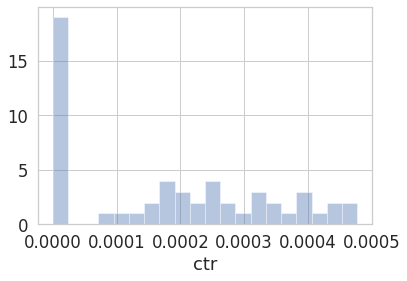

In [40]:
ctr_query = df.query('xyz_campaign_id == 916')
sns.distplot(ctr_query.ctr, bins=20, kde = False)

6.
    CPC (cost-per-click) – стоимость за клик пользователя по объявлению. 
    Рассчитывается путём деления суммы потраченных денег на общее число кликов:
    Выведите описательные статистики для новой переменной,
    посмотрите на форму распределения.    
    В ответе укажите межквартильный размах, округленный до двух знаков после точки.
    Обратите внимание, что в столбце могут встретиться NaN.  
    Если вы используете функцию iqr из scipy,
    то следует указать аргумент nan_policy='omit',
    чтобы их проигнорировать. При построении графика – метод .dropna()


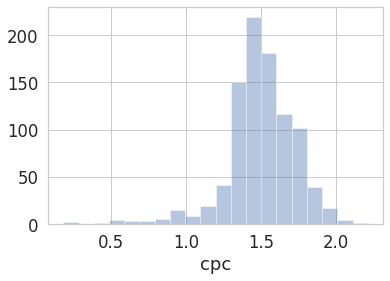

In [41]:
df['cpc'] = df['Spent']/df['Clicks']
sns.distplot(df.dropna().cpc, bins=20, kde = False)

In [42]:
df.cpc.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

In [43]:
# межквартильный размах
round(ss.iqr(df.cpc,nan_policy='omit'), 2)

0.25

7. 
Визуализируйте CPC с разбивкой по полу пользователей, 
которым были показаны объявления. Какой график получился?

Чтобы избежать появление ошибки, можно указать .dropna() при построении графика. 
Обратите внимание, что удалять NaN из самого датасета не нужно, 
только для визуализации. Картинка в полном размере – здесь.


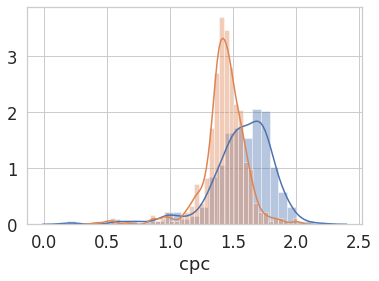

In [46]:
sns.distplot(df.query('gender == "M"').cpc.dropna())
sns.distplot(df.query('gender == "F"').cpc.dropna())

8. Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. 
Note: клики – Clicks, покупки – Approved_Conversion.

In [47]:
df['CR'] = df['Approved_Conversion']/ df['Clicks']
round(df.query('ad_id == 1121814').CR * 100, 2)

860    3.09
Name: CR, dtype: float64